<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220915.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re 
from functools import reduce 
from collections import defaultdict, Counter, ChainMap

# customer analysis

In [2]:
os.listdir()

['.config',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'sample_data']

In [3]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')

In [4]:
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [5]:
df.columns = df.iloc[0]
df.drop([0], axis = 0, inplace = True)

In [7]:
df['date'] = df.transaction_date.to_numpy().astype('datetime64[D]')
df['month'] = df.transaction_date.to_numpy().astype('datetime64[M]')
df['week'] = (df['date'] - df['date'].dt.weekday.astype('timedelta64[D]'))
df = df.rename(columns = {'customer_id':'id','list_price':'rev'}).groupby(['id','date','week','month','product_size'])['rev'].sum().reset_index()
df.head()

,id,date,week,month,product_size,rev
0,1,2017-01-05,2017-01-02,2017-01-01,medium,360.4
1,1,2017-02-21,2017-02-20,2017-02-01,medium,71.49
2,1,2017-03-27,2017-03-27,2017-03-01,small,688.63
3,1,2017-03-29,2017-03-27,2017-03-01,medium,1274.93
4,1,2017-04-06,2017-04-03,2017-04-01,medium,1577.53


In [8]:
list_npu = df.groupby(['id'])['date'].min().reset_index().rename(columns = {'date':'npu_date'})
df_ = pd.merge(df, list_npu, 'left', 'id')
df_['days'] = (df_['date'] - df_['npu_date']).dt.days
cnt = df_.groupby(['product_size', 'days'])['id'].count().reset_index().rename(columns = {'id':'pu'})
cnt['ratio'] = cnt.groupby(['product_size'])['pu'].apply(lambda x : round(x/x.max()*100,2))
cnt = pd.melt(cnt, id_vars = ['product_size', 'days'], var_name = 'type')
cnt.head()

,product_size,days,type,value
0,large,0,pu,694.0
1,large,1,pu,11.0
2,large,2,pu,10.0
3,large,3,pu,13.0
4,large,4,pu,7.0


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


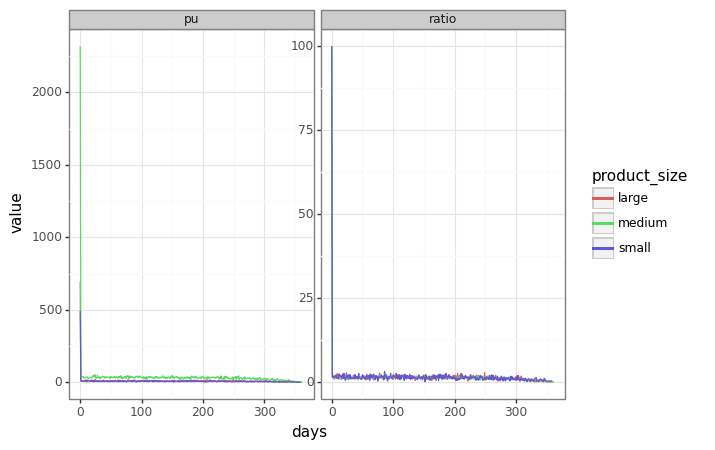

<ggplot: (8730598054885)>

In [9]:
(
    ggplot(cnt, aes('days','value', color = 'product_size')) +
    gg.geom_line() +
    gg.facet_wrap('~type', scales = 'free_y') +
    gg.theme_bw()
)

# iterator

In [10]:
mat = [list('ABC'), list('DEF'), list('GHI')]
for r, rows in enumerate(mat) :
  for c, letters in enumerate(rows) :
    print(f'({r},{c})-{letters}')

(0,0)-A
(0,1)-B
(0,2)-C
(1,0)-D
(1,1)-E
(1,2)-F
(2,0)-G
(2,1)-H
(2,2)-I


In [11]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [12]:
{key : eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])') for key in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [25]:
def add_arthor_with_name(name) :
  def add_arthor(func) :
    def wrapper(*args, **kwargs) :
      return name + '\n' + func(*args, **kwargs)
    return wrapper
  return add_arthor

def add_arthor(func) :
  def wrapper(*args, **kwargs) :
    return 'park' + '\n' + func(*args, **kwargs)
  return wrapper

@add_arthor_with_name('kim')
def get_title(title) :
  return title 

@add_arthor
def get_title2(t1, t2) : 
  return t1 + ' ' + t2

In [26]:
print(get_title('내안의 넌 달리지는게'))
print(get_title2('그렇다는 걸', '너도 알고 있잖아'))

kim
내안의 넌 달리지는게
park
그렇다는 걸 너도 알고 있잖아
